# Important tools

## Iterators and iterables

* **Iterable**: object that can return an iterator. Examples: lists, strings, dictionaries, files
* **Iterator**: object that keeps state and produces the next value when you call next() on it.

### Iterating over iterables

In [2]:
flash = ['jay garrick', 'barry allen', 'wally west', 'bart allen']

# You can accomplish the same thing with a for loop
# for person in flash:
#     print(person)

# Create an iterator for flash: superhero
superhero = iter(flash)

# Print each item from the iterator
print(next(superhero))
print(next(superhero))
print(next(superhero))
print(next(superhero))

jay garrick
barry allen
wally west
bart allen


In [3]:
# Create an iterator for range(3): small_value
small_value = iter(range(3))

# Print the values in small_value
print(next(small_value))
print(next(small_value))
print(next(small_value))

0
1
2


In [4]:
# Create an iterator for range(10 ** 100): googol
googol = iter(range(10 ** 100))

# Print the first 5 values from googol
print(next(googol))
print(next(googol))

0
1


In [5]:
# Create a range object: values
values = range(10, 21)

# Print the range object
print(values)

# Create a list of integers: values_list
values_list = list(values)

# Print values_list
print(values_list)

# Get the sum of values: values_sum
values_sum = sum(values)

# Print values_sum
print(values_sum)

range(10, 21)
[10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]
165


## Enumerate

Object that produces a sequence of tuples, and each of the tuples is an index-value pair.

In [6]:
# Create a list of strings: mutants
mutants = ['charles xavier', 'bobby drake', 'kurt wagner', 'max eisenhardt', 'kitty pryde']

# Create a list of tuples: mutant_list
mutant_list = list(enumerate(mutants))

# Print the list of tuples
print(mutant_list)

# Unpack and print the tuple pairs
for index1, value1 in enumerate(mutants):
    print(index1, value1)

# Change the start index
for index2, value2 in enumerate(mutants, start=1):
    print(index2, value2)

[(0, 'charles xavier'), (1, 'bobby drake'), (2, 'kurt wagner'), (3, 'max eisenhardt'), (4, 'kitty pryde')]
0 charles xavier
1 bobby drake
2 kurt wagner
3 max eisenhardt
4 kitty pryde
1 charles xavier
2 bobby drake
3 kurt wagner
4 max eisenhardt
5 kitty pryde


## Zip and argument unpacking

Takes any number of iterables and returns a zip object that is an iterator of tuples

In [8]:
mutants = ['charles xavier', 'bobby drake', 'kurt wagner', 'max eisenhardt', 'kitty pryde']
aliases = ['prof x', 'iceman', 'nightcrawler', 'magneto', 'shadowcat']
powers = ['telepathy', 'thermokinesis', 'teleportation', 'magnetokinesis', 'intangibility']

# Create a list of tuples: mutant_data
mutant_data = list(zip(mutants, aliases, powers))

# Print the list of tuples
print(mutant_data)

# Create a zip object using the three lists: mutant_zip
mutant_zip = zip(mutants, aliases, powers)

# Print the zip object
print(mutant_zip)

# Unpack the zip object and print the tuple values
for value1, value2, value3 in mutant_zip:
    print(value1, value2, value3)

[('charles xavier', 'prof x', 'telepathy'), ('bobby drake', 'iceman', 'thermokinesis'), ('kurt wagner', 'nightcrawler', 'teleportation'), ('max eisenhardt', 'magneto', 'magnetokinesis'), ('kitty pryde', 'shadowcat', 'intangibility')]
charles xavier prof x telepathy
bobby drake iceman thermokinesis
kurt wagner nightcrawler teleportation
max eisenhardt magneto magnetokinesis
kitty pryde shadowcat intangibility


#### Unpacking zip with *

In [13]:
mutants = ['charles xavier', 'bobby drake', 'kurt wagner', 'max eisenhardt', 'kitty pryde']
powers = ['telepathy', 'thermokinesis', 'teleportation', 'magnetokinesis', 'intangibility']

# Create a zip object from mutants and powers: z1
z1 = zip(mutants, powers)

# Print the tuples in z1 by unpacking with *
print(*z1)

# Re-create a zip object from mutants and powers: z1
z1 = zip(mutants, powers)

# 'Unzip' the tuples in z1 by unpacking with * and zip(): result1, result2
result1, result2 = zip(*z1)

# Check if unpacked tuples are equivalent to original tuples
print(list(result1) == mutants)
print(list(result2) == powers)

('charles xavier', 'telepathy') ('bobby drake', 'thermokinesis') ('kurt wagner', 'teleportation') ('max eisenhardt', 'magnetokinesis') ('kitty pryde', 'intangibility')
True
True


### Using iterators to load large files into memory

Processing large amounts of data

In [15]:
import pandas as pd

counts_dict = {}

# Iterate over the file chunk by chunk
for chunk in pd.read_csv('files/tweets.csv', chunksize=10):

    # Iterate over the column in DataFrame
    for entry in chunk['lang']:
        if entry in counts_dict.keys():
            counts_dict[entry] += 1
        else:
            counts_dict[entry] = 1

# Print the populated dictionary
print(counts_dict)


{'en': 97, 'et': 1, 'und': 2}


In [16]:
import pandas as pd

# Define count_entries()
def count_entries(csv_file, c_size, colname):
    """Return a dictionary with counts of
    occurrences as value for each key."""
    
    # Initialize an empty dictionary: counts_dict
    counts_dict = {}

    # Iterate over the file chunk by chunk
    for chunk in pd.read_csv(csv_file, chunksize=c_size):

        # Iterate over the column in DataFrame
        for entry in chunk[colname]:
            if entry in counts_dict.keys():
                counts_dict[entry] += 1
            else:
                counts_dict[entry] = 1

    # Return counts_dict
    return counts_dict

# Call count_entries(): result_counts
result_counts = count_entries('files/tweets.csv', 10, 'lang')

# Print result_counts
print(result_counts)


{'en': 97, 'et': 1, 'und': 2}


## List comprehensions

List comprehensions are a great way to make your code more Pythonic.

In [18]:
# It works but it's inefficient, both computationally and in terms of coding time and space

nums = [12, 8, 21, 3, 16]
new_nums = []

for num in nums:
    new_nums.append(num + 1)

print(new_nums)

[13, 9, 22, 4, 17]


List comprehensions are a concise way to create lists. They are a combination of a for loop and a list append.

In [19]:
nums = [12, 8, 21, 3, 16]

new_nums = [num + 1 for num in nums]

print(new_nums)

[13, 9, 22, 4, 17]


List comprehensions can be used with any iterable, not just lists.

In [20]:
result = [num for num in range(11)]
print(result)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]


**List comprehensions**

* Collapse for loops for building lists into a single line
* Components
  * Iterable
  * Iterator variable (represent members of iterable)
  * Output expression

List comprehensions can also be used with nested loops

In [25]:
# Using for loop
pairs_not_nested = []
for num1 in range(0, 2):
    for num2 in range(6, 8):
        pairs_not_nested.append((num1, num2))
print(pairs_not_nested)

# Using nested list comprehension
pairs_nested = [(num1, num2) for num1 in range(0, 2) for num2 in range(6, 8)]
print(pairs_nested)

assert pairs_nested == pairs_not_nested, "Nested and non-nested lists should be equal!"

# Trade-off: readability vs. efficiency

[(0, 6), (0, 7), (1, 6), (1, 7)]
[(0, 6), (0, 7), (1, 6), (1, 7)]


In [28]:
# Create a 5 x 5 matrix using a list of lists: matrix
matrix = [[col for col in range(5)] for row in range(5)]

# Print the matrix
for row in matrix:
    print(row)

[0, 1, 2, 3, 4]
[0, 1, 2, 3, 4]
[0, 1, 2, 3, 4]
[0, 1, 2, 3, 4]
[0, 1, 2, 3, 4]


## Advanced comprehensions

### Conditionals in comprehensions

In [29]:
# Conditionals on the iterable
[num ** 2 for num in range(10) if num % 2 == 0]

[0, 4, 16, 36, 64]

In [35]:
fellowship = ['frodo', 'samwise', 'merry', 'aragorn', 'legolas', 'boromir', 'gimli']

# Create list comprehension: new_fellowship, filtering by len
new_fellowship = [member for member in fellowship if len(member) >= 7]

new_fellowship

['samwise', 'aragorn', 'legolas', 'boromir']

In [32]:
# Conditionals on the output expression
[num ** 2 if num % 2 == 0 else 0 for num in range(10)]

[0, 0, 4, 0, 16, 0, 36, 0, 64, 0]

In [36]:
fellowship = ['frodo', 'samwise', 'merry', 'aragorn', 'legolas', 'boromir', 'gimli']

# Create list comprehension: new_fellowship
new_fellowship = [member if len(member) >= 7 else "" for member in fellowship]

new_fellowship

['', 'samwise', '', 'aragorn', 'legolas', 'boromir', '']

### Dict comprehensions

In [37]:
pos_neg = {num: -num for num in range(9)}

pos_neg

{0: 0, 1: -1, 2: -2, 3: -3, 4: -4, 5: -5, 6: -6, 7: -7, 8: -8}

In [38]:
fellowship = ['frodo', 'samwise', 'merry', 'aragorn', 'legolas', 'boromir', 'gimli']

# Create dict comprehension: new_fellowship
new_fellowship = {member: len(member) for member in fellowship}

print(new_fellowship)

{'frodo': 5, 'samwise': 7, 'merry': 5, 'aragorn': 7, 'legolas': 7, 'boromir': 7, 'gimli': 5}


## Generator expressions

A generator is like a list comprehension except it does not store the list in memory: it does not construct the list, but is an object we can iterate over to produce elements of the list as required.

Just replace the square brackets with round parentheses and it becomes a generator.

In [40]:
type([0, 2, 4, 6, 8, 10, 12, 14, 16, 18])

list

In [41]:
type((2 * num for num in range(10)))

generator

### List comprehensions vs. generators
* List comprehension - returns a list
* Generators - returns a generator object
* Both can be iterated over

#### Lazy evaluation

In [42]:
result = (num for num in range(6))

result

<generator object <genexpr> at 0x7f26a3f8af10>

In [43]:
print(next(result))

0


### Conditionals in generator expressions

### Generator functions
* Produces generator objects when called
* Defined like a regular function - `def`
* Yields a sequence of values instead of returning a single value
* Generates a value with `yield` keyword

In [45]:
def num_sequence(n):
    """Generate values from 0 to n."""
    i = 0
    while i < n:
        yield i
        i += 1
    
result = num_sequence(5)
print(type(result))

<class 'generator'>


In [46]:
for item in result:
    print(item)

0
1
2
3
4


In [47]:
import pandas as pd

df = pd.read_csv('files/tweets.csv')

# Extract the created_at column from df: tweet_time
tweet_time = df['created_at']

# Extract the clock time: tweet_clock_time
tweet_clock_time = [entry[11:19] for entry in tweet_time]

# Print the extracted times
print(tweet_clock_time)

['23:40:17', '23:40:17', '23:40:17', '23:40:17', '23:40:17', '23:40:17', '23:40:18', '23:40:17', '23:40:18', '23:40:18', '23:40:18', '23:40:17', '23:40:18', '23:40:18', '23:40:17', '23:40:18', '23:40:18', '23:40:17', '23:40:18', '23:40:17', '23:40:18', '23:40:18', '23:40:18', '23:40:18', '23:40:17', '23:40:18', '23:40:18', '23:40:17', '23:40:18', '23:40:18', '23:40:18', '23:40:18', '23:40:18', '23:40:18', '23:40:18', '23:40:18', '23:40:18', '23:40:18', '23:40:18', '23:40:18', '23:40:18', '23:40:18', '23:40:18', '23:40:18', '23:40:18', '23:40:18', '23:40:18', '23:40:18', '23:40:18', '23:40:18', '23:40:18', '23:40:18', '23:40:18', '23:40:18', '23:40:18', '23:40:18', '23:40:18', '23:40:18', '23:40:18', '23:40:18', '23:40:19', '23:40:18', '23:40:18', '23:40:18', '23:40:19', '23:40:19', '23:40:19', '23:40:18', '23:40:19', '23:40:19', '23:40:19', '23:40:18', '23:40:19', '23:40:19', '23:40:19', '23:40:18', '23:40:19', '23:40:19', '23:40:19', '23:40:19', '23:40:19', '23:40:19', '23:40:19', '23

Zipping lists and converting to dictionary

In [1]:
feature_names = ['CountryName', 'CountryCode', 'IndicatorName', 'IndicatorCode', 'Year', 'Value']
row_vals = ['Arab World', 'ARB', 'Adolescent fertility rate (births per 1,000 women ages 15-19)', 'SP.ADO.TFRT', '1960', '133.56090740552298']

# Zip lists: zipped_lists
zipped_lists = zip(feature_names, row_vals)

# Create a dictionary: rs_dict
rs_dict = dict(zipped_lists)

# Print the dictionary
print(rs_dict)

{'CountryName': 'Arab World', 'CountryCode': 'ARB', 'IndicatorName': 'Adolescent fertility rate (births per 1,000 women ages 15-19)', 'IndicatorCode': 'SP.ADO.TFRT', 'Year': '1960', 'Value': '133.56090740552298'}


Practice:

**World bank data**
* Data on world economies for over half a century
* Indicators
  * Population
  * Electricity consumption
  * CO2 emissions
  * Literacy rates
  * Unemployment
  * Mortality rates

In [2]:
import pandas as pd

df = pd.read_csv('files/world_ind_pop_data.csv')

df.head()

,CountryName,CountryCode,Year,Total Population,Urban population (% of total)
0,Arab World,ARB,1960,9.249590e+07,31.285384
1,Caribbean small states,CSS,1960,4.190810e+06,31.597490
2,Central Europe and the Baltics,CEB,1960,9.140158e+07,44.507921
3,East Asia & Pacific (all income levels),EAS,1960,1.042475e+09,22.471132
4,East Asia & Pacific (developing only),EAP,1960,8.964930e+08,16.917679


Lazy evaluation using generator functions

In [4]:
# Define read_large_file()
def read_large_file(file_object):
    """A generator function to read a large file lazily."""

    # Loop indefinitely until the end of the file
    while True:

        # Read a line from the file: data
        data = file.readline()

        # Break if this is the end of the file
        if not data:
            break

        # Yield the line of data
        yield data
        
# Open a connection to the file
with open('files/world_ind_pop_data.csv') as file:

    # Create a generator object for the file: gen_file
    gen_file = read_large_file(file)

    # Print the first three lines of the file
    print(next(gen_file))
    print(next(gen_file))
    print(next(gen_file))

CountryName,CountryCode,Year,Total Population,Urban population (% of total)

Arab World,ARB,1960,92495902.0,31.285384211605397

Caribbean small states,CSS,1960,4190810.0,31.5974898513652



Writing an iterator to load data in chunks with pd.read_csv()

In [7]:
import pandas as pd

# Initialize reader object: df_reader
df_reader = pd.read_csv('files/world_ind_pop_data.csv', chunksize=10)

# Print two chunks
print(next(df_reader))
print(next(df_reader))

                                 CountryName CountryCode  Year  \
0                                 Arab World         ARB  1960   
1                     Caribbean small states         CSS  1960   
2             Central Europe and the Baltics         CEB  1960   
3    East Asia & Pacific (all income levels)         EAS  1960   
4      East Asia & Pacific (developing only)         EAP  1960   
5                                  Euro area         EMU  1960   
6  Europe & Central Asia (all income levels)         ECS  1960   
7    Europe & Central Asia (developing only)         ECA  1960   
8                             European Union         EUU  1960   
9   Fragile and conflict affected situations         FCS  1960   

   Total Population  Urban population (% of total)  
0      9.249590e+07                      31.285384  
1      4.190810e+06                      31.597490  
2      9.140158e+07                      44.507921  
3      1.042475e+09                      22.471132  
4      8

In [1]:
import pandas as pd

# Initialize reader object: df_reader
df_reader = pd.read_csv('files/world_ind_pop_data.csv', chunksize=1000)

# Load first chunk of df: df_urb_pop
df_urb_pop = next(df_reader)

# Filter for rows where the CountryCode is 'CEB'
df_pop_ceb = df_urb_pop[df_urb_pop['CountryCode'] == 'CEB']

# Zip DataFrame columns of interest: pops
pops = zip(df_pop_ceb['Total Population'], df_pop_ceb['Urban population (% of total)'])

# Turn zip object into list: pops_list
pops_list = list(pops)

# Print pops_list
print(pops_list)

[(91401583.0, 44.5079211390026), (92237118.0, 45.206665319194), (93014890.0, 45.866564696018), (93845749.0, 46.5340927663649), (94722599.0, 47.2087429803526)]


/tmp/ipykernel_10481/2215214885.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_pop_ceb['Total Urban Population'] = [int(item[0] * item[1] / 100) for item in pops_list]


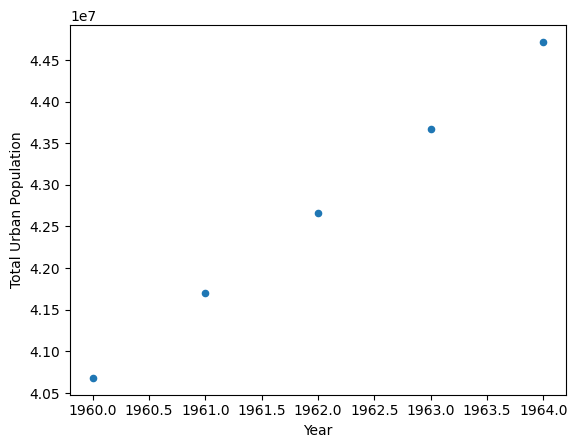

In [8]:
import pandas as pd
import matplotlib.pyplot as plt

urb_pop_reader = pd.read_csv('files/world_ind_pop_data.csv', chunksize=1000)

df_urb_pop = next(urb_pop_reader)

df_pop_ceb = df_urb_pop[df_urb_pop['CountryCode'] == 'CEB']

pops = zip(df_pop_ceb['Total Population'], df_pop_ceb['Urban population (% of total)'])
pops_list = list(pops)

# Use list comprehension to create new DataFrame column 'Total Urban Population'
df_pop_ceb['Total Urban Population'] = [int(item[0] * item[1] / 100) for item in pops_list]

# Plot urban population data
df_pop_ceb.plot(kind='scatter', x='Year', y='Total Urban Population')
plt.show()

Processing the a large dataset by working on smaller pieces of it

/tmp/ipykernel_10481/4008695460.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_pop_ceb['Total Urban Population'] = [int(tup[0] * tup[1] * 0.01) for tup in pops_list]
/tmp/ipykernel_10481/4008695460.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(df_pop_ceb)
/tmp/ipykernel_10481/4008695460.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_pop_ceb['Total Urban Population'] = [int(tup

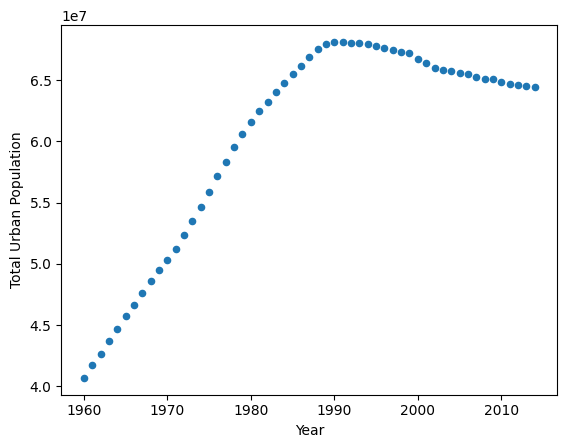

In [10]:
import pandas as pd
import matplotlib.pyplot as plt

# Initialize reader object: urb_pop_reader
urb_pop_reader = pd.read_csv('files/world_ind_pop_data.csv', chunksize=1000)

# Initialize empty DataFrame: data
data = pd.DataFrame()

# Iterate over each DataFrame chunk
for df_urb_pop in urb_pop_reader:

    # Check out specific country: df_pop_ceb
    df_pop_ceb = df_urb_pop[df_urb_pop['CountryCode'] == 'CEB']

    # Zip DataFrame columns of interest: pops
    pops = zip(df_pop_ceb['Total Population'],
                df_pop_ceb['Urban population (% of total)'])

    # Turn zip object into list: pops_list
    pops_list = list(pops)

    # Use list comprehension to create new DataFrame column 'Total Urban Population'
    df_pop_ceb['Total Urban Population'] = [int(tup[0] * tup[1] * 0.01) for tup in pops_list]
    
    # Append DataFrame chunk to data: data
    data = data.append(df_pop_ceb)

# Plot urban population data
data.plot(kind='scatter', x='Year', y='Total Urban Population')
plt.show()
